In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# How often does the candidate who raised more money win a race?
candidate_2020 = pd.read_csv("C:/Users/vetdd/NSS_project/open-secrets-three-musketeers/Data/_cleaned2.csv")
# find winners with maximum Rcpts in each race
max_rcpts = candidate_2020.groupby("DistIDCurr")["Rcpts"].transform("max")
candidate_2020["winner_no_MaxRcpts"] = (candidate_2020["Rcpts"] == max_rcpts) & (candidate_2020["Result"].str.upper() == "W")
summary_df = pd.DataFrame({
    'total_wins_with_max_Rcpts': [candidate_2020["winner_no_MaxRcpts"].sum()],
    'total_candidates': [candidate_2020["cid"].count()],
    'winning_percentage': [(candidate_2020["winner_no_MaxRcpts"].sum() / candidate_2020["cid"].count()) * 100 if candidate_2020["cid"].count() > 0 else 0]
})
print(summary_df)

   total_wins_with_max_Rcpts  total_candidates  winning_percentage
0                        386              1264           30.537975


In [3]:
# How often does the candidate who spent more money win a race? 
max_spent = candidate_2020.groupby("DistIDCurr")["Spent"].transform("max")
candidate_2020["winner_no_MaxSpent"] = (candidate_2020["Spent"] == max_spent) & (candidate_2020["Result"].str.upper() == "W")
summary_df = pd.DataFrame({
    'total_wins_with_max_spent': [candidate_2020["winner_no_MaxSpent"].sum()],
    'total_candidates': [candidate_2020["cid"].count()],
    'winning_percentage': [(candidate_2020["winner_no_MaxSpent"].sum() / candidate_2020["cid"].count()) * 100 if candidate_2020["cid"].count() > 0 else 0]
})
print(summary_df)

   total_wins_with_max_spent  total_candidates  winning_percentage
0                        383              1264           30.300633


In [8]:
print(print

         cid               FirstLastP       Rcpts       Spent    EndCash  \
0  N00044245           Jerry Carl (R)  1971321.50  1859348.91  111972.59   
1  N00044750       James Averhart (D)    80094.95    78973.24    1121.71   
2  N00041295          Barry Moore (R)   650806.75   669367.70  -13633.28   
3  N00045944  Phyllis Harvey-Hall (D)    56049.68    55988.07       0.00   
4  N00045631            John Page (L)        0.00        0.00       0.00   

  Result CRPICO    State DistIDCurr  sort State_Abv  District  \
0      W      O  Alabama       AL01     2        AL         1   
1      L      O  Alabama       AL01     2        AL         1   
2      W      O  Alabama       AL02     2        AL         2   
3      L      O  Alabama       AL02     2        AL         2   
4             O  Alabama       AL02     2        AL         2   

   winner_no_MaxRcpts  winner_no_MaxSpent  
0                True                True  
1               False               False  
2                Tru

Average of EndCash by group: Result
W    831426.082471
L     18017.375543
       1663.990323
Name: EndCash, dtype: float64


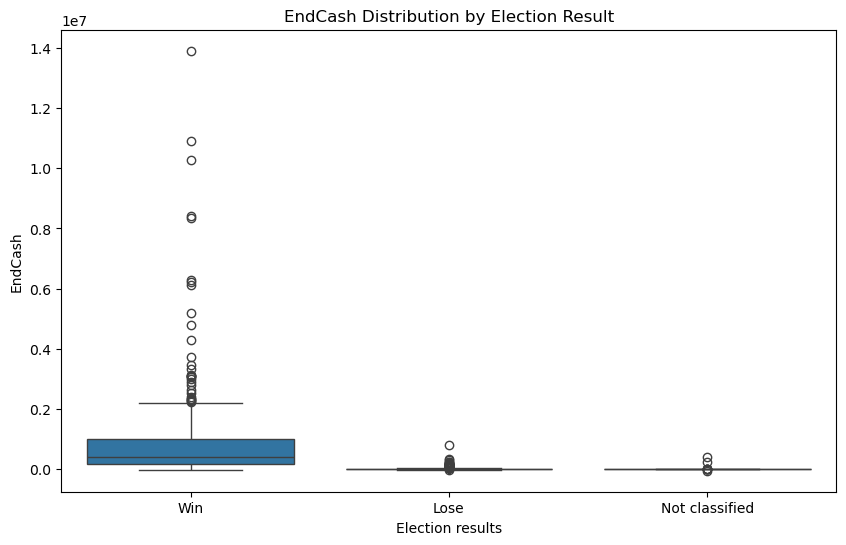

In [32]:
# Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race? 
candidate_2020['Result'] = candidate_2020['Result'].str.replace(r'\s+', '', regex=True).str.upper()
mean_endcash = candidate_2020.groupby('Result')['EndCash'].mean()
print(f'Average of EndCash by group:', mean_endcash.nlargest())
# Visualize data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='EndCash', data=candidate_2020)
plt.title('EndCash Distribution by Election Result')
plt.xlabel('Election results')
plt.ylabel('EndCash')
plt.xticks(ticks=[0,1, 2], labels=["Win", "Lose", "Not classified"])
plt.show()

In [34]:
#How often does the incumbent candidate win a race?

# find incumbent candidates who win race
candidate_2020["incumbent_winner"] = (candidate_2020["sort"] == 1) & (candidate_2020["Result"].str.upper() == "W")
summary_df = pd.DataFrame({
    'total_wins_in_incumbent': [candidate_2020["incumbent_winner"].sum()],
    'total_candidates': [candidate_2020["cid"].count()],
    'winning_percentage': [(candidate_2020["incumbent_winner"].sum() / candidate_2020["cid"].count()) * 100 if candidate_2020["cid"].count() > 0 else 0]
})
print(summary_df)

   total_wins_in_incumbent  total_candidates  winning_percentage
0                      373              1264           29.509494


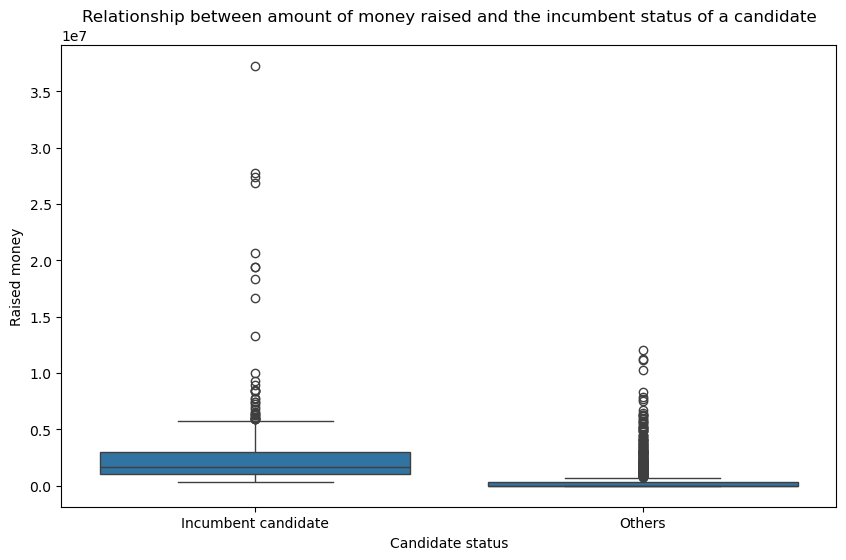

NameError: name 'stats' is not defined

In [36]:
#Can you detect any relationship between amount of money raised and the incumbent status of a candidate?
mean_raised_money = candidate_2020.groupby('sort')['Rcpts'].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sort', y='Rcpts', data=candidate_2020)
plt.title('Relationship between amount of money raised and the incumbent status of a candidate')
plt.xlabel('Candidate status')
plt.ylabel('Raised money')
plt.xticks(ticks=[0,1], labels=["Incumbent candidate", "Others"])
plt.show()


In [ ]:
# write logistic regression model to see if the amount spent has a statistically significant impact on the probability of winning an election.  
